In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
import matplotlib.pyplot as plt
import random
import shutil
from collections import OrderedDict
from tqdm.notebook import tqdm

import torch
import pytorch_lightning as pl
from pathlib import Path
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger, MLFlowLogger
from pytorch_lightning.utilities.distributed import rank_zero_only

from modules.datasets import PointDataModule
from modules.models import PointNetModel
from modules.utils import read_config

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '../input/'
OUTPUT_PATH = 'output/'
OUTPUT_CHECKPOINT = OUTPUT_PATH + 'best_model.ckpt'
TRN_CONFIG_PATH = 'configs/train.yaml'
TST_CONFIG_PATH = 'configs/infer.yaml'
LOG_DIR = 'work_dir/lightning_logs'


num_workers = 8

### Init Datamodule

In [3]:
config = read_config(TRN_CONFIG_PATH)
config['num_workers'] = num_workers

pl.seed_everything(config["seed"])

dm = PointDataModule(
        DATA_PATH,
        valid_size=config['val_size'],
        config=config
    )
dm.setup('fit')
ds = next(iter(dm.train_dataloader()))

ds['pointcloud'].shape, ds['label'].shape

Global seed set to 42


(torch.Size([4, 38793, 3]), torch.Size([4, 1]))

### Training

In [4]:
@rank_zero_only
def copy_checkpoint(src_checkpoint_path, dst_checkpoint_path):
    dst_checkpoint_path.parents[0].mkdir(parents=True, exist_ok=True)
    shutil.copy(src_checkpoint_path, dst_checkpoint_path)

model = PointNetModel(config)
tb_logger = TensorBoardLogger(LOG_DIR, name='name')
checkpoint_path = os.path.join(tb_logger.log_dir, 'checkpoints')

checkpoint_callback = ModelCheckpoint(
        dirpath=checkpoint_path,
        save_last=True,
        **config['checkpoint_callback']
)

trainer = pl.Trainer(
        logger=[tb_logger],
        callbacks=[checkpoint_callback],
        gpus=[0],
        max_epochs=config['n_epochs']
)
trainer.logger.log_hyperparams(config)
trainer.fit(model, datamodule=dm)

# Copy best checkpoint to best infer model folder
checkpoint_path = checkpoint_callback.best_model_path
if OUTPUT_CHECKPOINT is not None:
        copy_checkpoint(
            checkpoint_path,
            Path(OUTPUT_CHECKPOINT)
       )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/bulat/anaconda3/envs/lidar_car_detection/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type     | Params
----------------------------------
0 | net  | PointNet | 3.5 M 
----------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.846    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/bulat/anaconda3/envs/lidar_car_detection/lib/python3.9/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
Global seed set to 42


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 89: val_loss reached 1.63549 (best 1.63549), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=0-step=89.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 179: val_loss reached 1.51501 (best 1.51501), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=1-step=179.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 269: val_loss reached 1.18401 (best 1.18401), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=2-step=269.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 359: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 449: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 539: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 629: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 719: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 809: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 899: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 989: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 1079: val_loss reached 1.16067 (best 1.16067), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=11-step=1079.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 1169: val_loss reached 1.11079 (best 1.11079), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=12-step=1169.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 1259: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 1349: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 1439: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 1529: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 1619: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 1709: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1799: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1889: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1979: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 2069: val_loss reached 1.09118 (best 1.09118), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=22-step=2069.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 2159: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 2249: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 2339: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 2429: val_loss reached 1.08556 (best 1.08556), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=26-step=2429.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 2519: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 2609: val_loss reached 1.01215 (best 1.01215), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=28-step=2609.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 2699: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 2789: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 2879: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 2969: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 3059: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 3149: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 3239: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 3329: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 37, global step 3419: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 38, global step 3509: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 39, global step 3599: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 40, global step 3689: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 41, global step 3779: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 42, global step 3869: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 43, global step 3959: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 44, global step 4049: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 45, global step 4139: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 46, global step 4229: val_loss reached 0.99511 (best 0.99511), saving model to "/home/bulat/ML/Kaggle/AICrowd/LidarCarDetection/PointNet/work_dir/lightning_logs/name/version_1/checkpoints/epoch=46-step=4229.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 47, global step 4319: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 48, global step 4409: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 49, global step 4499: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 50, global step 4589: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 51, global step 4679: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 52, global step 4769: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 53, global step 4859: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 54, global step 4949: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 55, global step 5039: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 56, global step 5129: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 57, global step 5219: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 58, global step 5309: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 59, global step 5399: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 60, global step 5489: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 61, global step 5579: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 62, global step 5669: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 63, global step 5759: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 64, global step 5849: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 65, global step 5939: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 66, global step 6029: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 67, global step 6119: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 68, global step 6209: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 69, global step 6299: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 70, global step 6389: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 71, global step 6479: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 72, global step 6569: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 73, global step 6659: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 74, global step 6749: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 75, global step 6839: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 76, global step 6929: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 77, global step 7019: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 78, global step 7109: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 79, global step 7199: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 80, global step 7289: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 81, global step 7379: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 82, global step 7469: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 83, global step 7559: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 84, global step 7649: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 85, global step 7739: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 86, global step 7829: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 87, global step 7919: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 88, global step 8009: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 89, global step 8099: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 90, global step 8189: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 91, global step 8279: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 92, global step 8369: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 93, global step 8459: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 94, global step 8549: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 95, global step 8639: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 96, global step 8729: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 97, global step 8819: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 98, global step 8909: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 99, global step 8999: val_loss was not in top 1
Saving latest checkpoint...


### Inference

In [5]:
# Prepare datamodule
config = read_config(TST_CONFIG_PATH)
config['num_workers'] = num_workers
pl.seed_everything(config["seed"])

dm = PointDataModule(
        DATA_PATH,
        valid_size=0.1,
        config=config
    )
dm.setup('test')
ds = next(iter(dm.test_dataloader()))
ds['pointcloud'].shape

Global seed set to 42


torch.Size([2, 38793, 3])

In [6]:
# Inference
model = PointNetModel(config)
model = model.net
checkpoint = torch.load(OUTPUT_CHECKPOINT)['state_dict']
upd_checkpoint = OrderedDict()
for key in checkpoint.keys():
        upd_checkpoint['.'.join(key.split('.')[1:])] = checkpoint[key]
    # Update model weights
model.load_state_dict(upd_checkpoint)

model.eval()
model.cuda()

ids = []
labels = []
for batch in tqdm(dm.test_dataloader()):
    inputs, indicies = batch['pointcloud'], batch['index']
    inputs = inputs.transpose(1, 2).cuda()
    outputs, m3x3, m64x64 = model(inputs)
    labels.append(outputs.view(-1).detach().cpu().numpy())
    ids.append(indicies)

  0%|          | 0/301 [00:00<?, ?it/s]

In [9]:
# Create submission file
ids_ = np.hstack(ids).copy()
labels_ = np.hstack(labels).copy()
submission = pd.DataFrame(np.vstack([ids_, labels_]).transpose(), columns=['idx', 'label'])
#submission['label'] = submission['label'].apply(lambda x: round(x))
submission.index = submission['idx'].values.astype(int)
submission = submission.sort_index()
submission = submission.drop(['idx'], axis=1)
submission.to_csv('submission.csv', index=False)
submission.head()


,label
0,2.012904
1,0.859324
2,2.459637
3,1.106717
4,0.966103


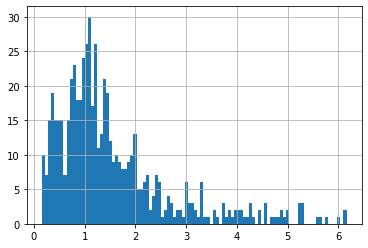

In [10]:
submission['label'].hist(bins=100);